## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [47]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [48]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [49]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [50]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [51]:
#Check the total number of rows that have converted=1 out of the total number of entries
df.query("converted=='1'").user_id.nunique()/df.user_id.nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [52]:
#Check how many rows don't have group = treatment and landing_page = new_page
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [53]:
#No rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [54]:
#Create new dataframe df2 containing only aligned data by removing the rows where data is not aligned
df2=df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [55]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [56]:
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [57]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [58]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id'].unique()[0]

773192

c. What is the row information for the repeat **user_id**? 

In [59]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [60]:
#Keep the last record as it is the most recent one
df2.drop_duplicates(subset='user_id',keep='last',inplace=True)

/Users/delia.amarandei/Documents/python/udacity_data_analyst/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [61]:
#Check if duplicates were removed
df2.duplicated().sum()

0

In [62]:
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [63]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [64]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [65]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [66]:
df2[(df2['landing_page'] == 'new_page')]['user_id'].count()/df2['user_id'].count()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**There is no sufficient evidence to conclude that the new treatment page leads to a better conversion rate, or at least not by looking at the data overall. The percentage of the converted users receiving the original page and the users receiving the one with a treatment applied are almost the same, and so is the total number of users receiving the control and the treatment page.
Looking at it by aggregating it on a time level such as day or month might lead to a better conclusion.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

  $$H_0: p_{new} - p_{old} \leq 0$$
  $$H_1: p_{new} - p_{old} > 0$$
  

**In this case, there is a question associated with a direction - that is the converted rate for the old page $p_{old}$ is greater than converted rate for the new page $p_{new}$.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [67]:
# According to the assumption in the null hypothesis we will have both p_new and p_old's success rates 
# equal to the converted success rate regardless of page
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null?

In [68]:
# According to the assumption in the null hypothesis we will have both p_new and p_old's success rates 
# equal to the converted success rate regardless of page
p_old = df2.converted.mean()
p_old

0.11959708724499628

In [69]:
#Calculate the observed difference
obs_diff = p_new - p_old
obs_diff

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [70]:
n_new = df2.query('group=="treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [71]:
n_old = df2.query('group=="control"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [72]:
#Use numpy's random.choice to get 0's & 1's randomly generated, with a size n_new 
#and a probability of 1-p_new for 0 and p_new for 1
new_page_converted = np.random.choice(2, n_new, p = [1-p_new,  p_new])
new_page_converted 

array([0, 0, 0, ..., 0, 1, 1])

In [73]:
sample = np.random.choice(2, n_new,p = [1-p_new,  p_new])
sample.size

145310

In [74]:
sample

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
sample.mean()

0.11787901727341546

In [76]:
#Check the size of the new array
new_page_converted.size

145310

In [77]:
#Calculate the new p_new
p_new = new_page_converted.mean()
p_new

0.11917280297295438

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [78]:
#Use numpy's random.choice to get 0's & 1's randomly generated, with a size n_old 
#and a probability of 1-p_old for 0 and p_old for 1
old_page_converted = np.random.choice(2, n_old, p = [1-p_old,  p_old])
old_page_converted 

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
#Check the size of the new array
old_page_converted.size

145274

In [80]:
#Calculate the new p_old
p_old = old_page_converted.mean()
p_old

0.12031746905846882

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [81]:
p_new - p_old

-0.0011446660855144453

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [85]:
#Simulate 10000 values for the differences between p_new and p_old and store them in a new array p_diffs
p_diffs = []
for _ in range(10000):
    p_new = df2.converted.mean()
    p_old = df2.converted.mean()
    new_page_converted = np.random.choice(2, n_new,p = [1-p_new,  p_new])
    old_page_converted = np.random.choice(2, n_old,p = [1-p_old,  p_old])
    diff_page_converted = new_page_converted.mean()-old_page_converted.mean()
    p_diffs.append(diff_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

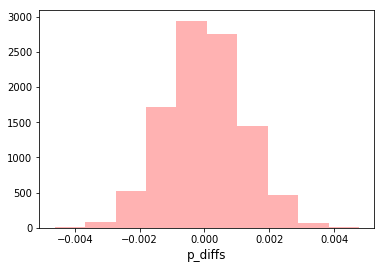

In [83]:
#Compute the sampling distribution in order to see if this is a normal distribution
plt.hist(p_diffs, color = 'red', alpha = .3);
plt.xlabel('p_diffs', size = 12);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [87]:
actual_diff = df2.query('group=="treatment"').converted.mean() - df2.query('group=="control"').converted.mean()
(p_diffs>actual_diff).mean()

0.9048

In [88]:
#Compare also for the normal distribution
null_vals = np.random.normal(0, np.std(p_diffs), 10000)

In [89]:
(null_vals>actual_diff).mean()

0.9022

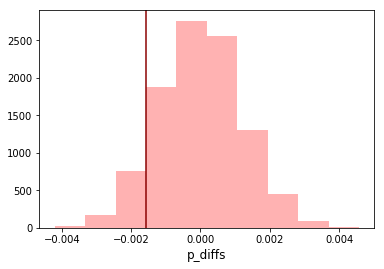

In [90]:
plt.hist(p_diffs, color = 'red', alpha = .3);
plt.axvline(x=actual_diff, color = 'darkred');
plt.xlabel('p_diffs', size = 12);

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We assumed that $H_0$ is true. Both of the conversions of the new page p_new and old page p_old were equal to the conversion of both pages, no matter if a treatment was applied or not. Knowing this, we simulated n_new and n_old number of transactions based on the total number of users for each page, with the same conversion probability as initially assumed. <br><br>
In order to find if the sampling distribution follows the null hypothesis we calculated the p-value which is the probability of observing the actual value of the statistic from the data in this sampling distribution.<br><br>
With a large p-value (0.9028) being considerably higher than the Type I error rate α of 0.05 we can observe that we have failed to reject the null hypotheses.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [91]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == "1"').shape[0]
convert_new = df2.query('group == "treatment" and converted == "1"').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [92]:
#Chosen the alternative = smaller as we assume the null hypotheses is true
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A test for a population proportion was computed based on a normal one sample (z) test which resulted in the z_score, so the test statistic for the z-test and in the p_value, which is the proportion of values for the z-test. Both p-values computed before and through the z-test are greater than the Type I error alpha (0.9028 & 0.9050 > 0.05) which result in the same conclusion, that the difference is statistical significant and therefor we have failed to rejet the null hypotheses.
Z-score of 1.31 in the Z score table gives us a value of 0.9049**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case, we would like to predict a categorical response with 2 possible outcomes (if the page showed, control or treatment, converted or not) and to find a probability between 0 and 1 for conversion, therefor a logistic regression would be better.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [93]:
#Adding the intercept
df2['intercept'] = 1

/Users/delia.amarandei/Documents/python/udacity_data_analyst/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [94]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [95]:
#Add dummy variables columns and remove one as it is not necessary
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('treatment', axis=1)

/Users/delia.amarandei/Documents/python/udacity_data_analyst/venv/lib/python3.7/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [96]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [97]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        16:06:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [113]:
#Exponentiate the coefficients
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [114]:
#Compute the reciprocal as the value is less than 1
1/_

0.00010001000100010001

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Part II:
$$H_0: p_{new} - p_{old} \leq 0$$
$$H_1: p_{new} - p_{old} > 0$$

Part III:
$$H_0: β_1 = 0$$
$$H_1: β_1 <> 0$$
  
**In Part II the null hyphoteses stated that the new page performs worse or equal to the old one while the alternative hypthotesis stated that the new page performs better than the old one.
In Part III, by using logistic regression, we are now checking if the p-value is equal to 0, in the null hyphotesis, or different than 0, in the alternative hyphotesis. This means that we are looking to see if the type of the page (control or treatment) has any impact on the conversion. <br><br>
The p-value can be found under P>|z|, associated with ab_page we have the value of 0.190. Given the null and alternative hypotheses we can see that the p-value is different than null, so if the page was the control or the treatment one is not statistically significant.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Given that in our current regression model we only had one variable, which we proved to not be statistically significant, it would be good to add additional variables. One that might be suitable would be if the users are new or returning users, as this might also explain if they are reticent to change or not.<br><br>
A disadvantage of adding too many terms into the model would be that some of them might be correlated between each other (multicollinearity), and this would provide too positive results which might not be true and result in wrong decisions if a correction is not applied.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [99]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [100]:
#Set user_id as index and join the two data frames on user_id
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [102]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [103]:
df_new.shape

(290584, 7)

In [105]:
#Check distinct countries
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [106]:
#Create from the the categorical country variable the dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [107]:
#Add the new variables to the model and fit it again
log_mod_new = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA','UK']])
results_new = log_mod_new.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [108]:
results_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 08 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        16:28:51   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [115]:
#Exponentiate the coefficients
np.exp(results_new.params)

intercept    0.136795
ab_page      0.985168
CA           0.960062
UK           1.009932
dtype: float64

In [116]:
#Compute the reciprocal as some values are less than 1
1/_

0.00010001000100010001

**By adding CA & UK to our model we can see that country had almost no impact on conversion as the p-value increased with 0.001 and the control page (ab_page) is 0.985168 times as likely as the treatment page to increase conversion, holding all other variables constant. Same goes by generating the reciprocal, which states that control page is 0.0001 less likely than treatment page to increase conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [109]:
#Create new variables as an interaction between the country dummy variables and the page type
df_new['CA_ab_page'] = df_new['CA']*df_new['ab_page'] 
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page'] 

In [110]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,CA_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [111]:
#Create a new version of the model with the new variables
log_mod_new2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page','CA','UK','CA_ab_page','UK_ab_page']])

In [112]:
#Fit the new model
results_new2 = log_mod_new2.fit()
results_new2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 May 2019   Pseudo R-squ.:               3.482e-05
Time:                        16:47:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [117]:
#Exponentiate the coefficients
np.exp(results_new2.params)

intercept     0.137178
ab_page       0.979646
CA            0.982625
UK            0.994272
CA_ab_page    0.954198
UK_ab_page    1.031896
dtype: float64

In [118]:
#Compute the reciprocal as some values are less than 1
1/_

0.00010001000100010001

<a id='conclusions'></a>
## Conclusions


**In this AB test results analysis we were provided with 2 different pages, the old one, control, and a new one with a treatment applied. We were provided also with the conversion outcome for each combination of user and page viewed. We needed to identify if the new page, the treatment, increases conversion and therefor should be further released.
<br><br>
We conducted 2 types of analysis, we first checked through sampling distribution and hyphothesis testing if the new version is better than the old. This was a one sided test.
We have failed to reject the null hyphoteses as the p-value (0.9028) computed was considerably higher than the Type I error rate α of 0.05.
In the second part we used logistic regression in three models:**

**- First checking only how the control performs against the treatment page**<br><br>
**- Rebuilt the model by adding a new variable, countries, into the model**<br><br>
**- Rebuilt the model by adding new combined variables, between the group and the country**

**This was a two-sided test as we wanted to see the correlation between user conversion and different variables.
None of the three models tested provided satisfactory results and they all pointed to the same result with p-value being less than the alpha error and the R-squared having a value much lower than 1 in all cases, making the results insignificant.
<br><br>
Given these results, we would advice against releasing the new page, as it has proven to have no impact on conversion and, if we take into account other factors (such as additional costs and working capacity) required for release it might even have a negative impact.**
